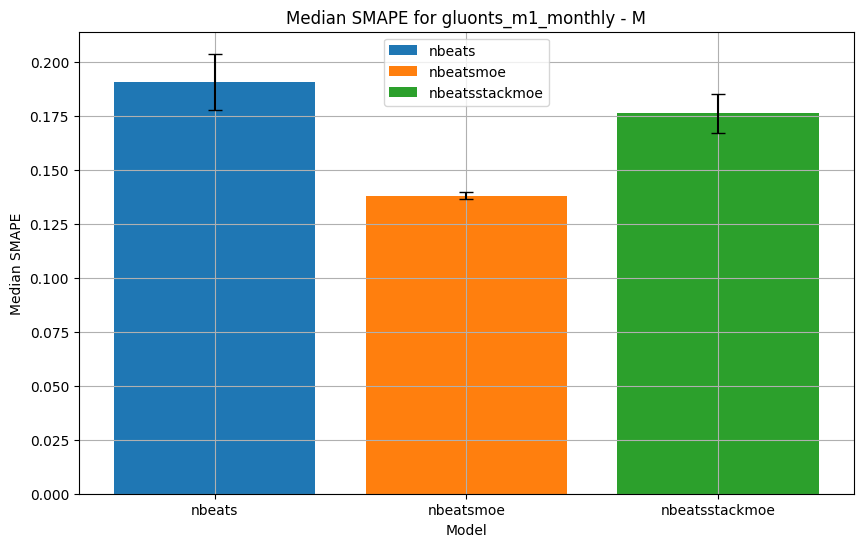

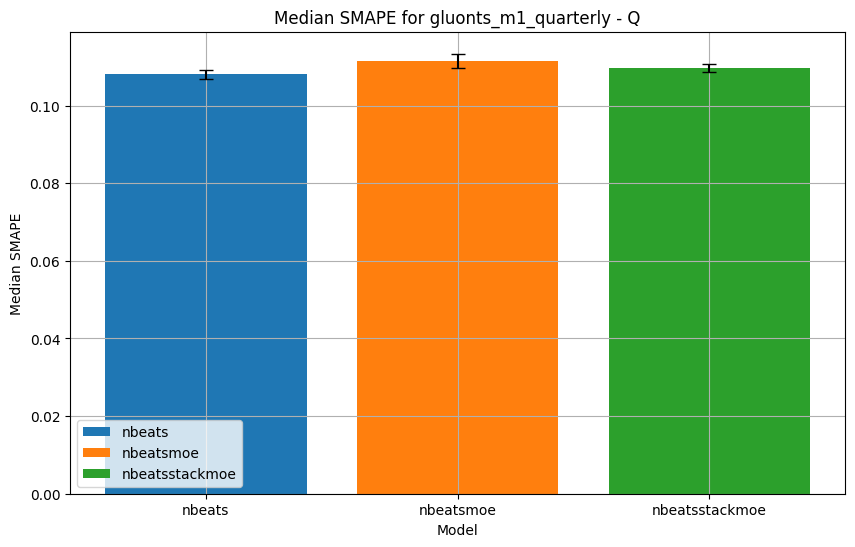

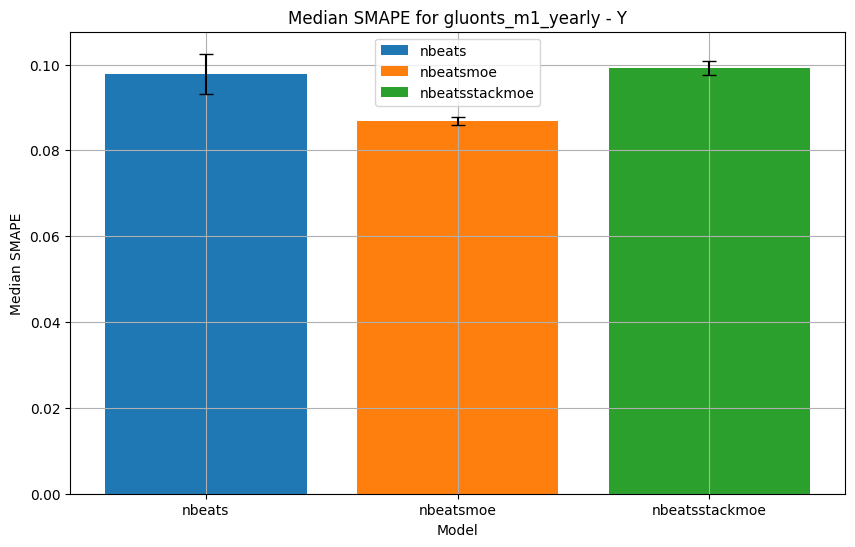

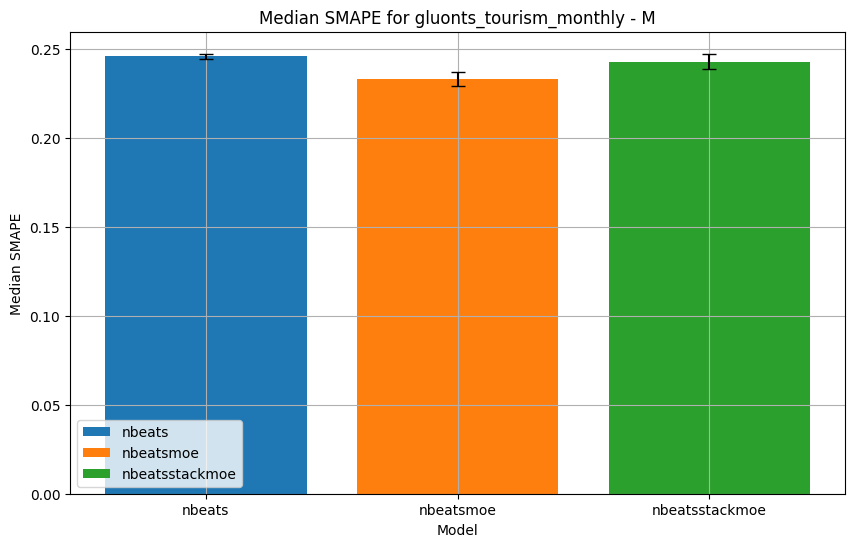

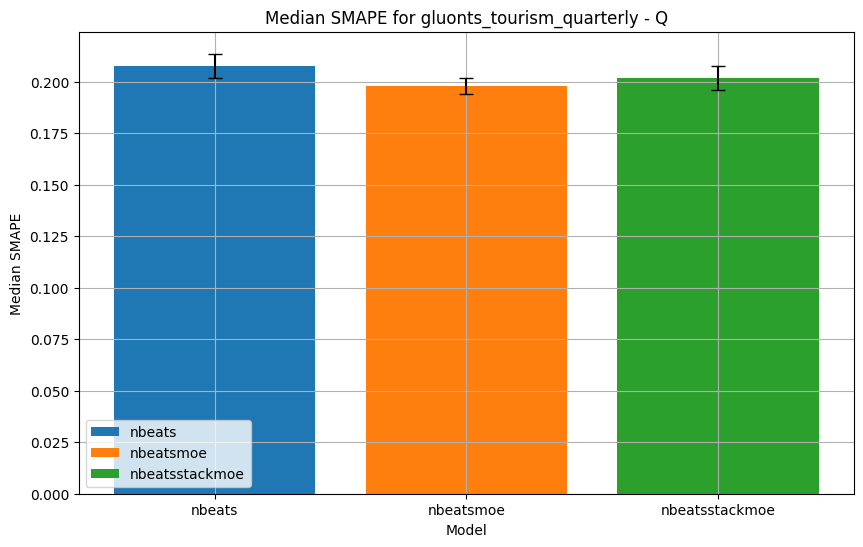

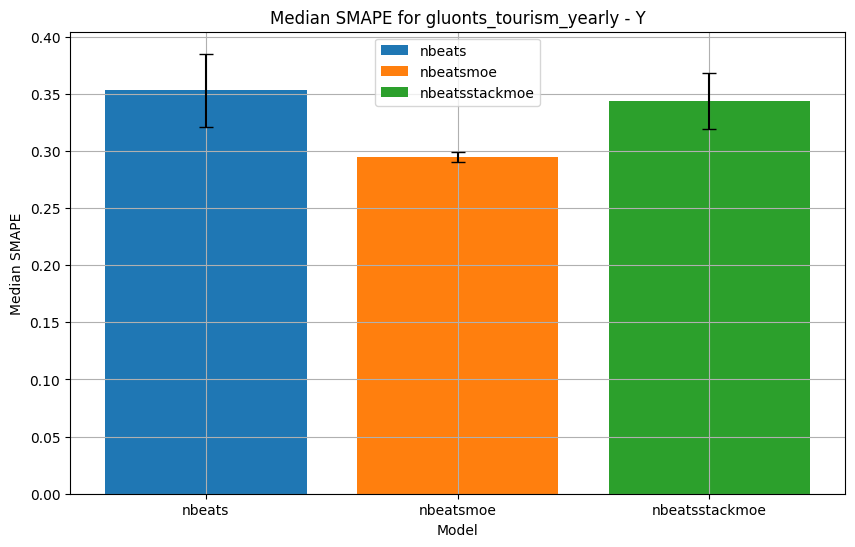

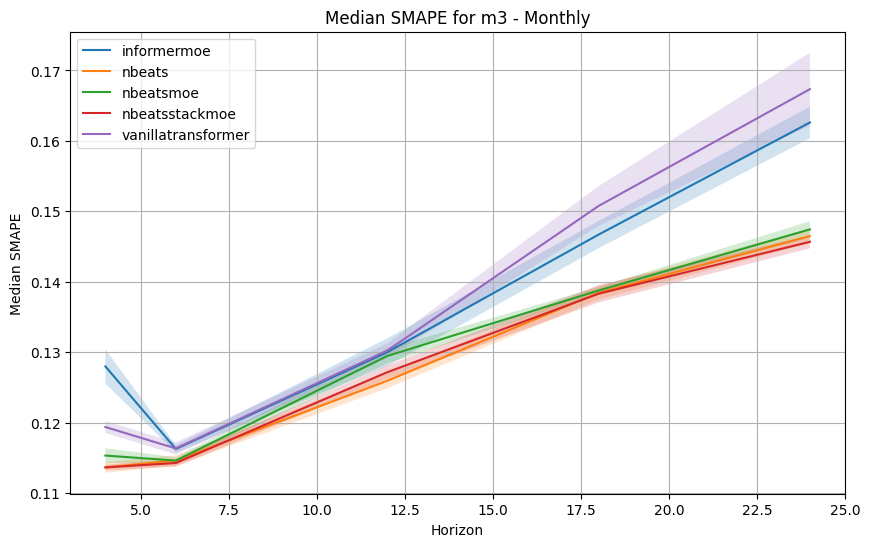

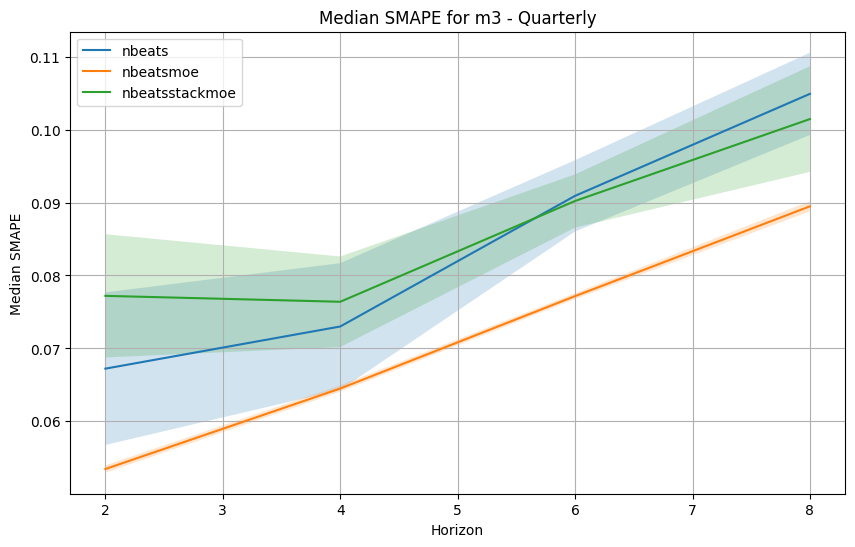

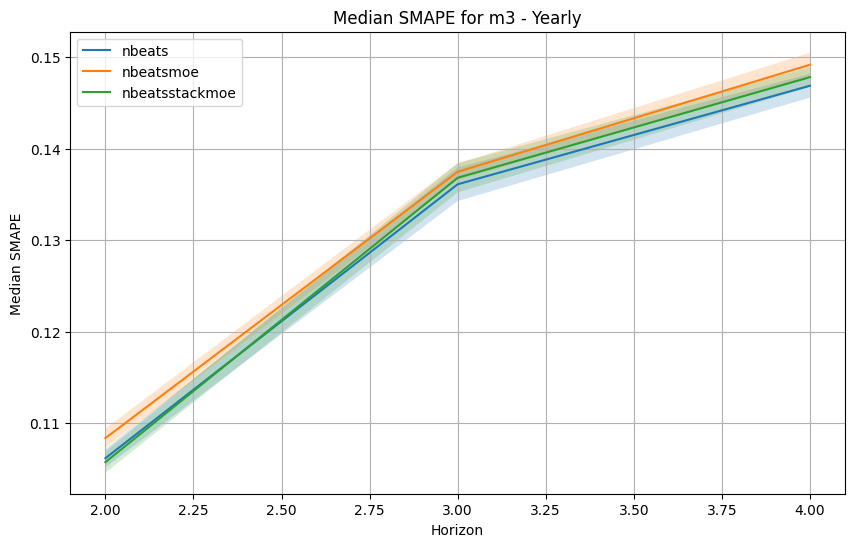

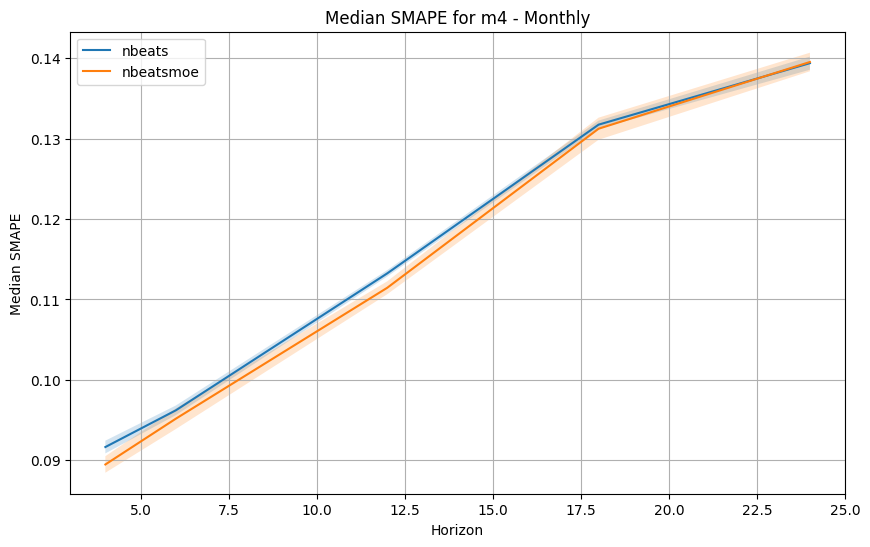

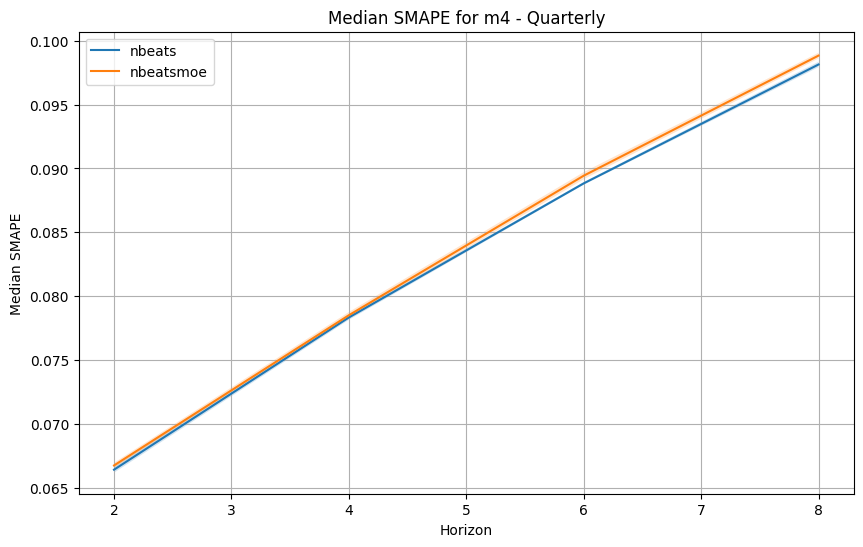

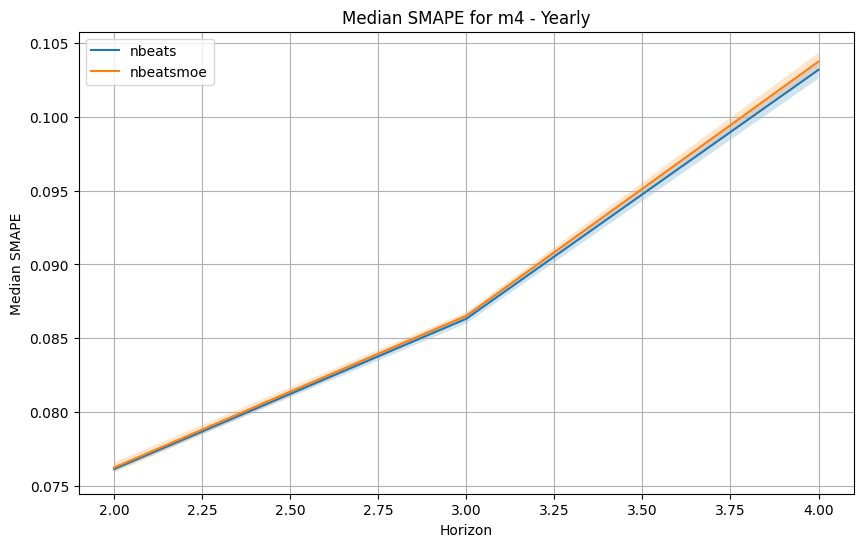

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_smape_results(data_path):
    """
    Function to plot SMAPE results from a CSV file.
    
    Parameters:
    - data_path (str): Path to the CSV file containing the results.
    """
    # Load the data
    data = pd.read_csv(data_path)

    # Group by dataset and group first
    for (dataset, group_name), subset in data.groupby(["dataset", "group"]):
        
        plt.figure(figsize=(10, 6))  # Create a new figure for each dataset-group
        
        # Check the number of unique horizons
        unique_horizons = subset["horizon"].nunique()
        
        if unique_horizons > 1:
            # Use line plot
            for model_name, model_data in subset.groupby("model_name"):
                horizons = model_data["horizon"]
                median_smape = model_data["median_smape"]
                std_dev_smape = model_data["std_dev_smape"]

                # Plot median SMAPE
                plt.plot(horizons, median_smape, label=model_name)

                # Plot standard deviation as shaded area
                plt.fill_between(
                    horizons,
                    median_smape - std_dev_smape,
                    median_smape + std_dev_smape,
                    alpha=0.2
                )
            
            plt.xlabel("Horizon")
        else:
            # Use bar plot
            for model_name, model_data in subset.groupby("model_name"):
                median_smape = model_data["median_smape"].values[0]  # Single value
                std_dev_smape = model_data["std_dev_smape"].values[0]  # Single value

                # Bar plot with error bars
                plt.bar(model_name, median_smape, yerr=std_dev_smape, capsize=5, label=model_name)

            plt.xlabel("Model")

        # Titles and labels
        plt.title(f"Median SMAPE for {dataset} - {group_name}")
        plt.ylabel("Median SMAPE")
        plt.legend()
        plt.grid()
        
        # Show or save the plot
        plt.show()  # Replace with plt.savefig(f"{dataset}_{group_name}.png") to save

plot_smape_results("C:\\Users\\ricar\\mixture_of_experts_time_series\\results\\results_summary.csv")

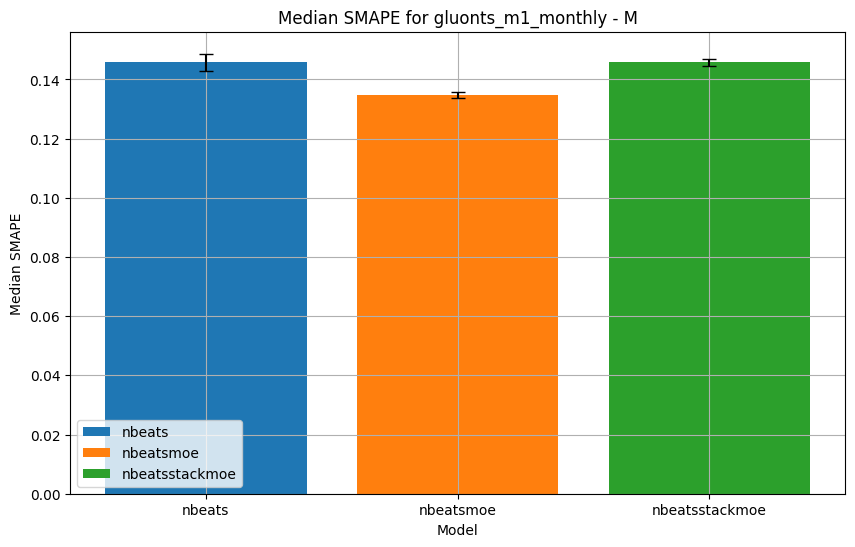

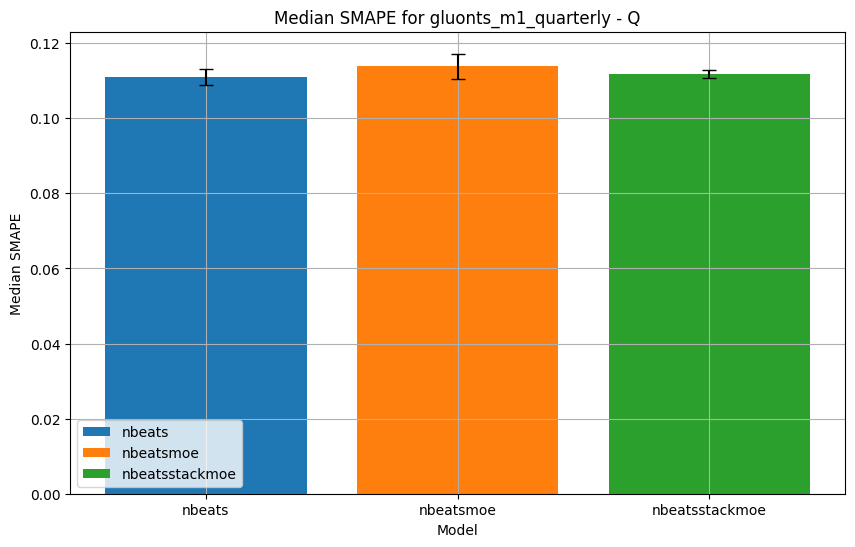

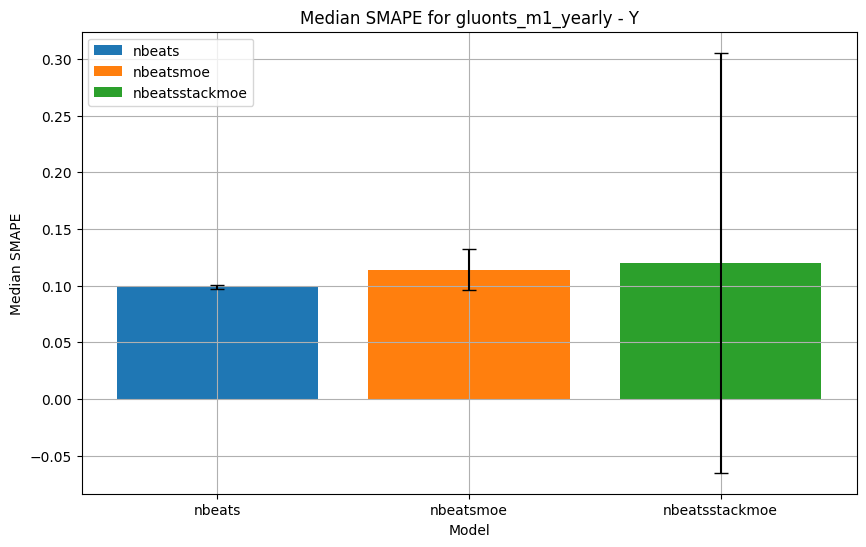

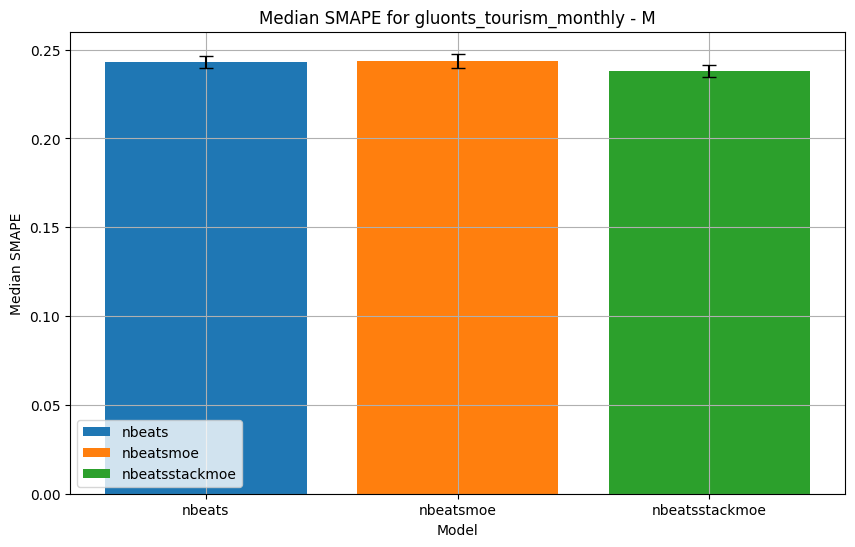

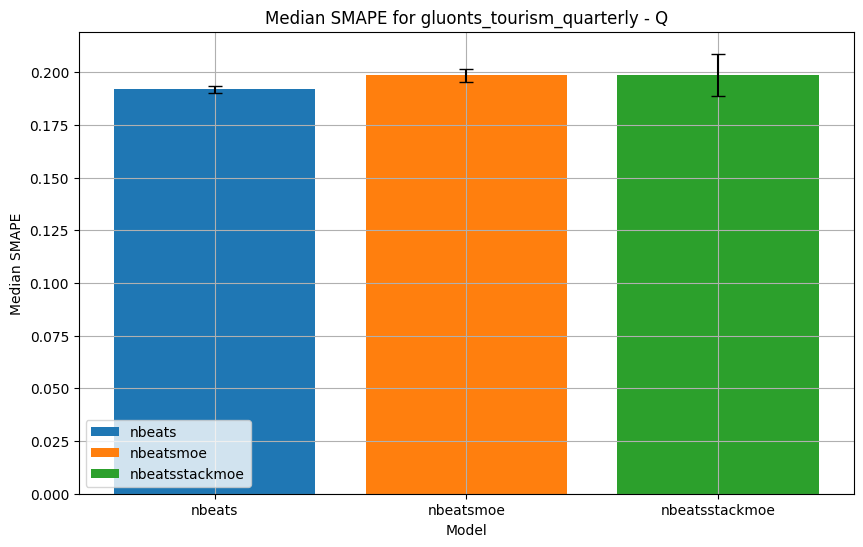

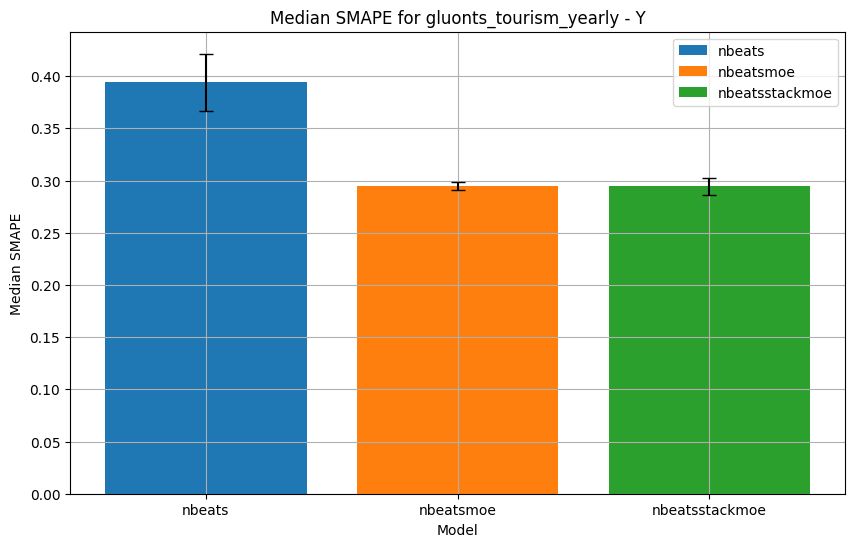

In [3]:
plot_smape_results("C:\\Users\\ricar\\mixture_of_experts_time_series\\results\\results_summary_100_trials.csv")

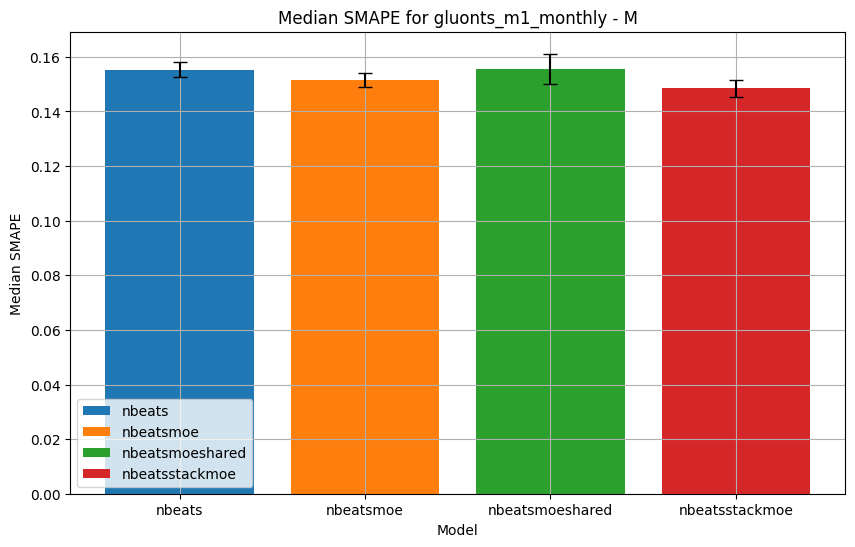

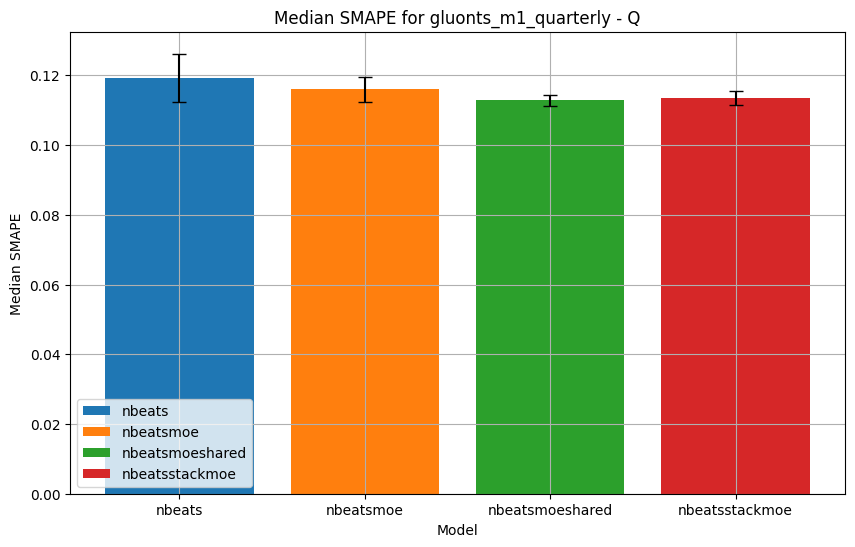

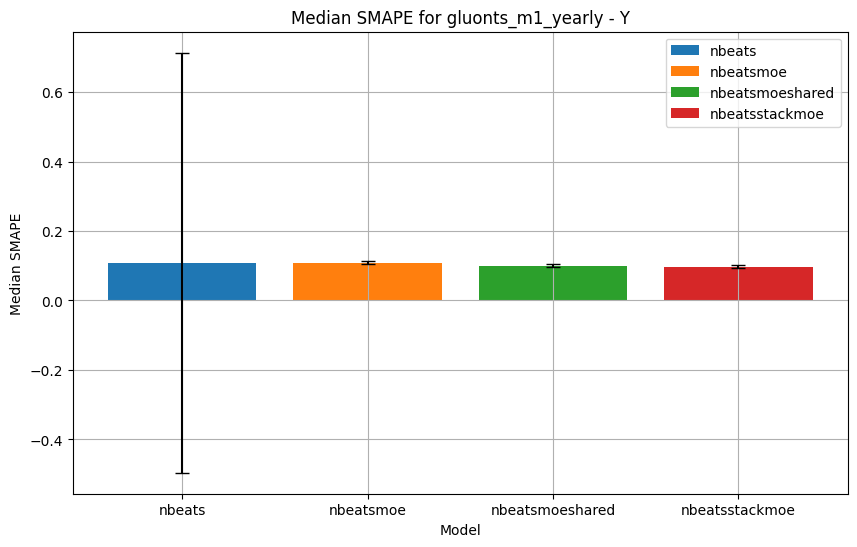

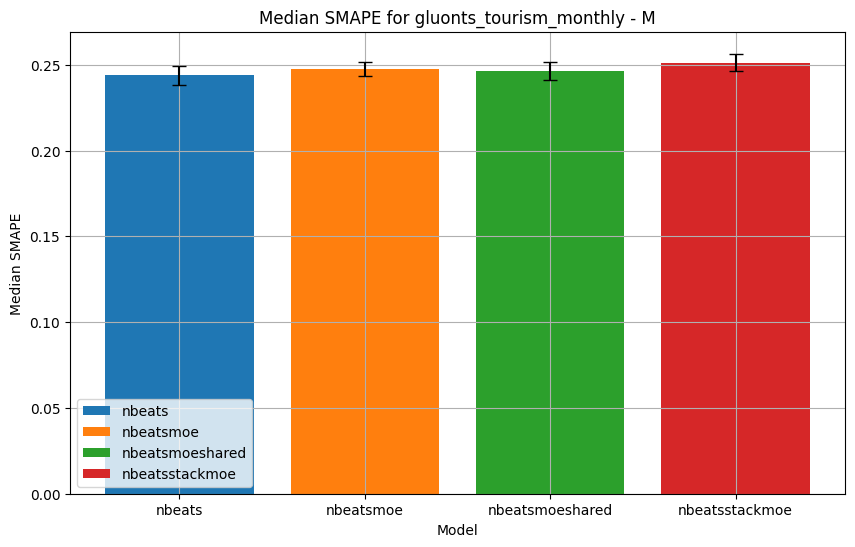

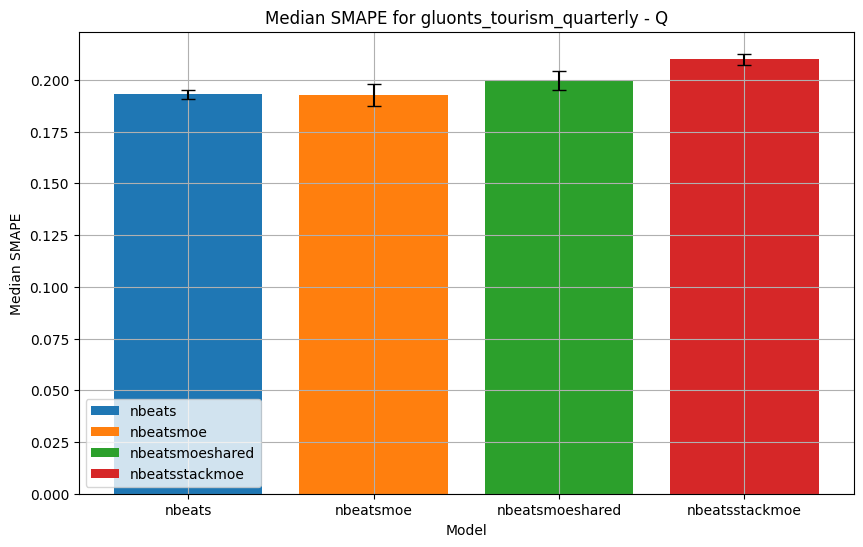

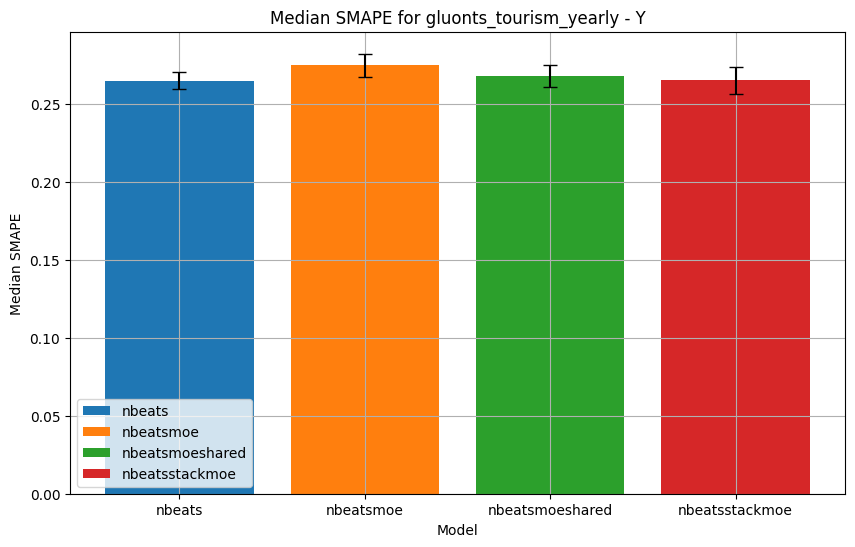

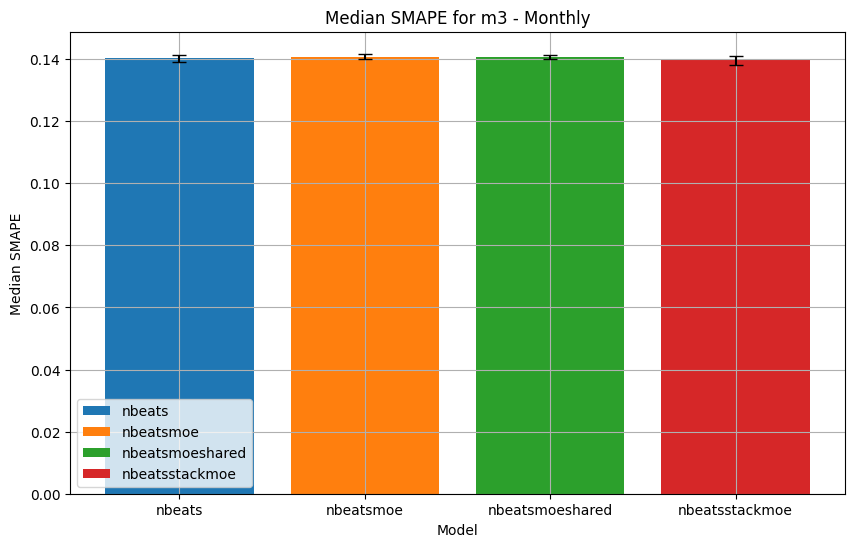

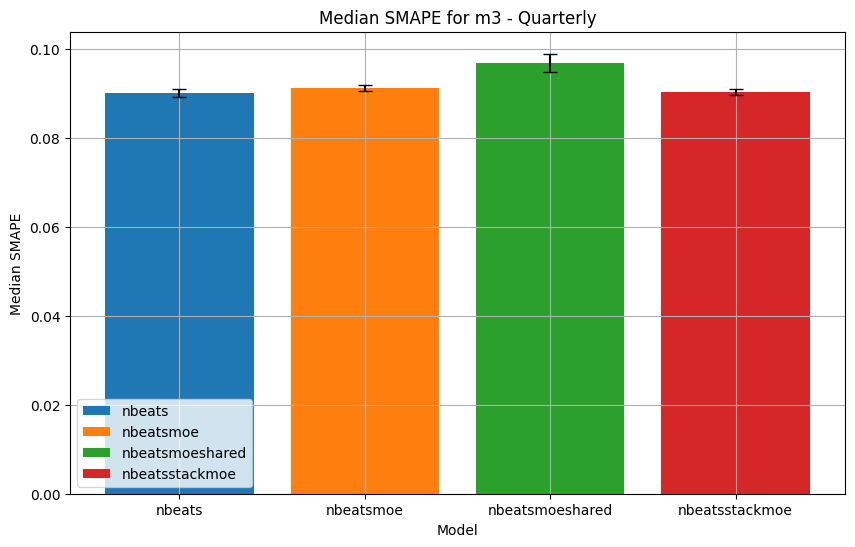

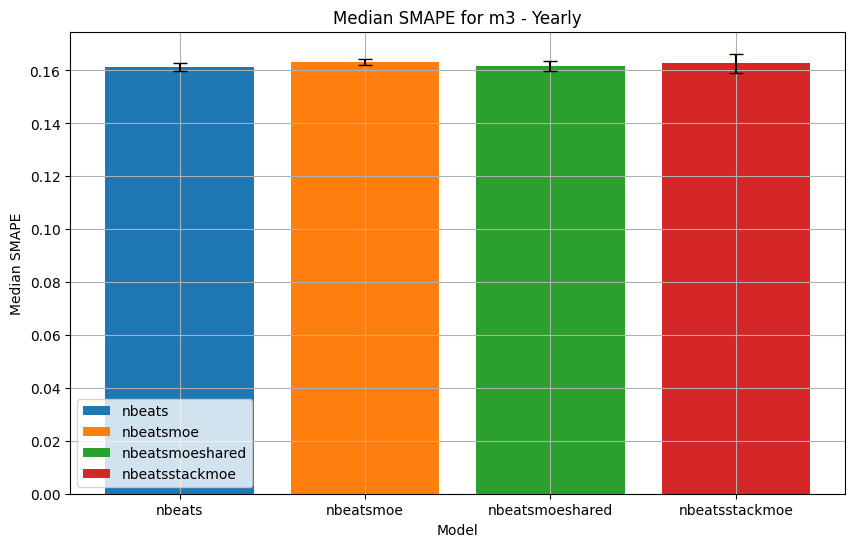

In [6]:
plot_smape_results("C:\\Users\\ricar\\mixture_of_experts_time_series\\results_summary_with_blcs.csv")